In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats 
sns.set(style="whitegrid")


%matplotlib inline


<h1>Warm UP</h1>

<h2>Read the data</h2>

In [3]:
users = pd.read_csv("user_data_sample.csv")
songs = pd.read_csv("end_song_sample.csv")
data = songs.merge(users, how='inner', on='user_id')


<h2>



Users understanding</h2>

In [4]:
print('There is', len(users) ,'users registered')
users.head()


There is 9565 users registered


,gender,age_range,country,acct_age_weeks,user_id
0,male,25 - 29,FR,329,97f47c9fba714ca68320b8a80e010a1a
1,female,45 - 54,US,178,d615ca85849d458e9a5d755ec4727e8f
2,female,18 - 24,DE,68,6c83a5bf63b74f85b106ac7e7e015a1b
3,female,30 - 34,US,8,530fcedb3f244e6f91ecb326740005eb
4,female,30 - 34,FR,42,d2ed6a815eda4f61aa346b7936d03ef7


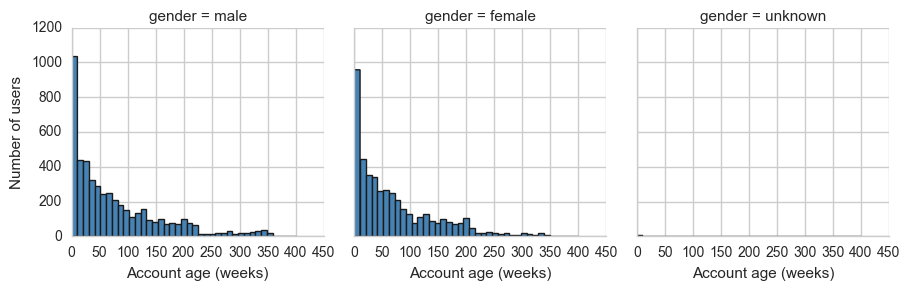

In [17]:
g = sns.FacetGrid(users, col="gender", margin_titles=True)
bins = np.linspace(0, 400, 40)
g.map(plt.hist, "acct_age_weeks", color="steelblue", bins=bins, lw=1).set_axis_labels("Account age (weeks)", "Number of users")



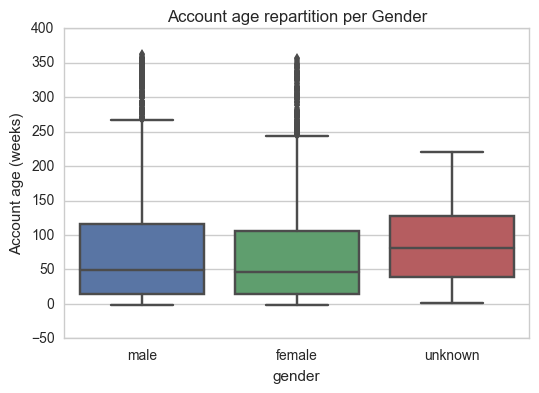

In [19]:
sns.boxplot(y="acct_age_weeks", x="gender", data=users)
plt.ylabel("Account age (weeks)")
plt.title("Account age repartition per Gender")

We see that the global distribution of the age of the user account looks pretty much the same for men and women. Most users are new on the producs for about <b>50 weeks</b>.

We also see that there is some users with <b>Unknown</b> gender. Let's see how many of them we have


In [5]:
print('there is', len(users[users.gender == 'unknown']), 'users with unknown gender')


there is 26 users with unknown gender


They are not that many so we can see how to manage them later (maybe remove them)

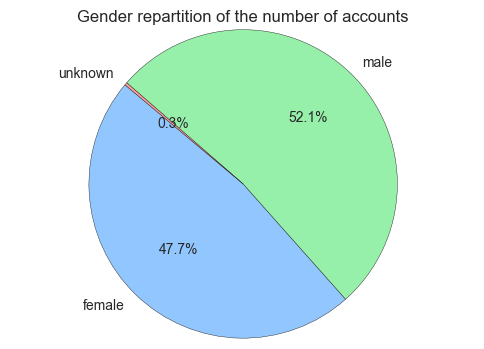

In [12]:
gender = users.groupby(['gender'], as_index=False).agg({"user_id":pd.Series.nunique})
gender.columns = ['gender', 'count_users']
plt.title("Gender repartition of the number of accounts")
plt.pie(gender.count_users, labels=gender.gender,  autopct='%1.1f%%',startangle=140)
plt.axis('equal')

plt.show()


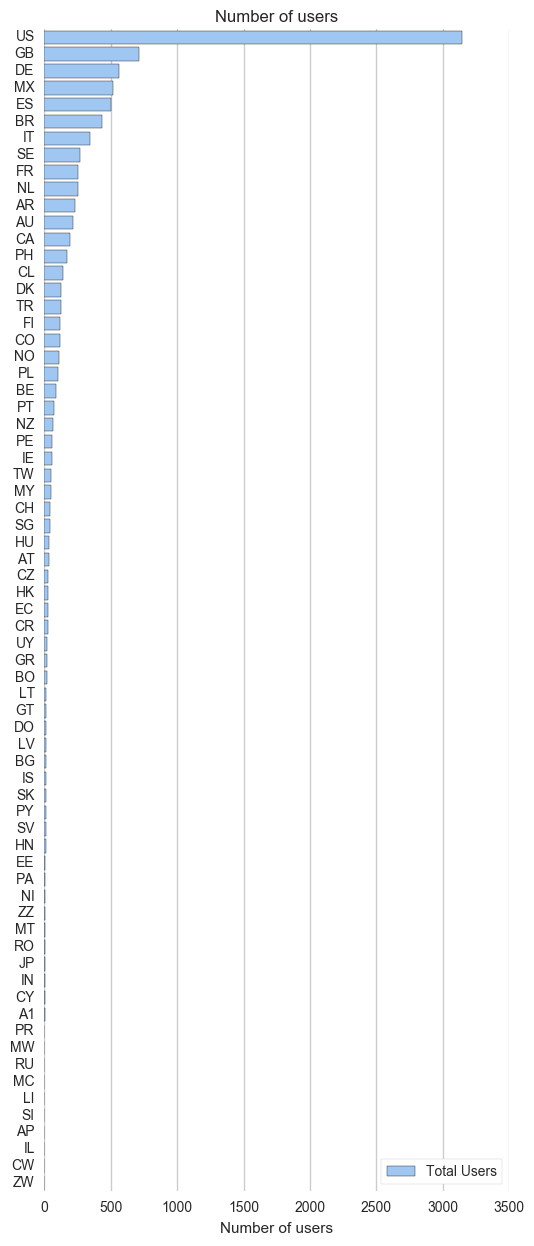

In [7]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))
country_gender = users.groupby(['country'], as_index=False).agg({"user_id":"count"})

country_gender.columns = ['country', 'count_users']

country_gender = country_gender.sort_values("count_users", ascending=False)

# Plot the all the users
sns.set_color_codes("pastel")
sns.barplot(x="count_users", y="country", data=country_gender,
            label="Total Users", color="b")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Number of users")
sns.despine(left=True, bottom=True)
plt.title('Number of users')
#sns.barplot()

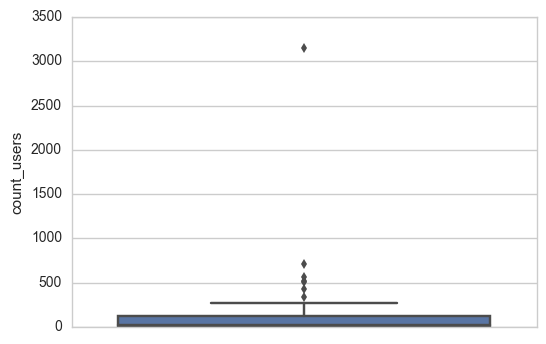

In [10]:
sns.boxplot(country_gender.count_users, orient='v')

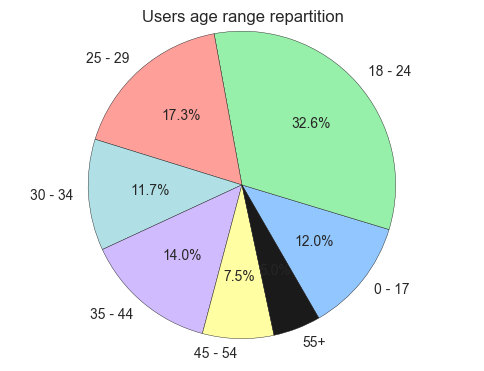

In [8]:
age = users.groupby(['age_range'], as_index=False).agg({"user_id":"count"})
age.columns = ['age_range', 'count_users']

plt.pie(age.count_users, labels=age.age_range,  autopct='%1.1f%%', startangle=300)
plt.axis('equal')
plt.title("Users age range repartition")
plt.show()


<h2>Tracks listening understanding</h2>

In [9]:
songs.describe()

,ms_played,end_timestamp
count,1.342891e+06,1.342891e+06
mean,1.287120e+05,1.444270e+09
std,1.200548e+05,3.518090e+05
min,0.000000e+00,1.443658e+09
25%,3.778000e+03,1.443964e+09
50%,1.476780e+05,1.444272e+09
75%,2.228010e+05,1.444574e+09
max,5.100017e+06,1.444867e+09


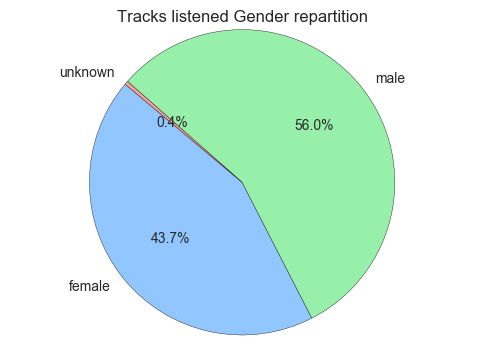

In [11]:
count_tracks_per_gender = data.groupby(['gender'], as_index=False).agg({"track_id":pd.Series.nunique})
count_tracks_per_gender.columns = ['gender', 'count_tracks']
plt.title("Tracks listened Gender repartition")
plt.pie(count_tracks_per_gender.count_tracks, labels=count_tracks_per_gender.gender,
    autopct='%1.1f%%',startangle=140)
plt.axis('equal')

plt.show()


The reparition of differentes tracks listenened is slightly different than the repartition of the users. Are men slightly more diverse in their taste of music than women?? (We'll see confirm that hypothesis with a statistical test)

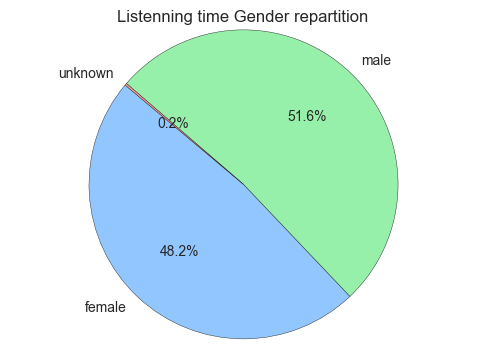

In [11]:
listen_time_per_gender = data.groupby(['gender'], as_index=False).agg({"ms_played":"sum"})
listen_time_per_gender.columns = ['gender', 'sum_listen_time']
plt.title("Listenning time Gender repartition")
plt.pie(listen_time_per_gender.sum_listen_time, labels=listen_time_per_gender.gender,
    autopct='%1.1f%%',startangle=140)
plt.axis('equal')

plt.show()


At first sight, We can assume that male and female listeners are pretty much the same in their overall listening.<br />
Let's confirm it via some statisticals tests

<h2>Statisticals Tests</h2>

<h3>Tracks diversity</h3>

Let's see if men are as diverse as women in term of tracks listened.

Student Test
Null Hypothesis for the test : The distribution of the number of tracks listened is the same for men and women
p-value = 0.955


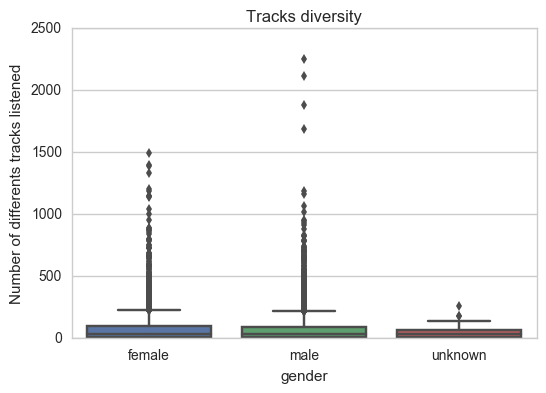

In [15]:
count_tracks = data.groupby(['gender', 'user_id'], as_index=False).agg({"track_id":pd.Series.nunique})
count_tracks.columns = ['gender', 'user_id', 'count_tracks']

count_tracks_male = count_tracks[count_tracks.gender == 'male']
count_tracks_female = count_tracks[count_tracks.gender == 'female']

print("Student Test")
print("Null Hypothesis for the test : The distribution of the number of tracks listened is the same for men and women")
t, pvalue = stats.ttest_ind(count_tracks_male.count_tracks, count_tracks_female.count_tracks, equal_var=True)
print("p-value = {0:.3f}".format(pvalue))

sns.boxplot(data=count_tracks, x="gender", y="count_tracks")
plt.ylabel('Number of differents tracks listened')
plt.title('Tracks diversity')

With a p-value of <b>0.955</b> (which is far greater than <i>0.05</i>) we can assume that the null hypothesis is right.<br/>
So, <b>The gender has no influence on the tracks diversity</b>

<h3>Listening time</h3>

In terms of the count of listening time, let's test if male and female listeners are significantly different in their overall listening

In [26]:
listen_time = data.groupby(['gender', 'user_id'], as_index=False).agg({"ms_played":"sum"})
listen_time.columns = ['gender','user_id' ,'sum_listen_time']

listen_time_male = listen_time[listen_time.gender == 'male']
listen_time_female = listen_time[listen_time.gender == 'female']

print("Student Test")
print("Null Hypothesis for the test : The distribution of the listening time is the same for men and women")
t, pvalue = stats.ttest_ind(listen_time_male.sum_listen_time, listen_time_female.sum_listen_time, equal_var=True)
print("p-value = {0:.3f}".format(pvalue))

Student Test
Null Hypothesis for the test : The distribution of the listening time is the same for men and women
p-value = 0.621


With a p-value of <b>0.621</b> (which is far greater than <i>0.05</i>) we can assume that the null hypothesis is right.<br/>
So, <b>The gender has no influence on the Listening time</b>

,ms_played,context,track_id,product,end_timestamp,user_id,gender,age_range,country,acct_age_weeks
0,330962,album,2ab4f3b3a6c34fbaba95c2451b65efbd,open,1.444790e+09,a9abbb14c8544898a0e06feb94f8051e,male,18 - 24,US,35
1,7476,album,0f5f2acbcf244490948ac2e63adade73,open,1.444790e+09,a9abbb14c8544898a0e06feb94f8051e,male,18 - 24,US,35
2,227280,collection,0f4a2173eb1f4aa9b8693ad7a92fab73,open,1.444797e+09,a9abbb14c8544898a0e06feb94f8051e,male,18 - 24,US,35
3,325,playlist,affc7467b68e4dfab9d1d7b9ec8d4673,open,1.444796e+09,a9abbb14c8544898a0e06feb94f8051e,male,18 - 24,US,35
4,204196,collection,427fd37cbfe640a8a78179477c9f33d3,open,1.444799e+09,a9abbb14c8544898a0e06feb94f8051e,male,18 - 24,US,35
